Module 6 Case study 3

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn

In [5]:
# read the data

df = pd.read_csv('additional_resources_6_xce_lwxlitn/FyntraCustomerData.csv')
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
# correlations in the data

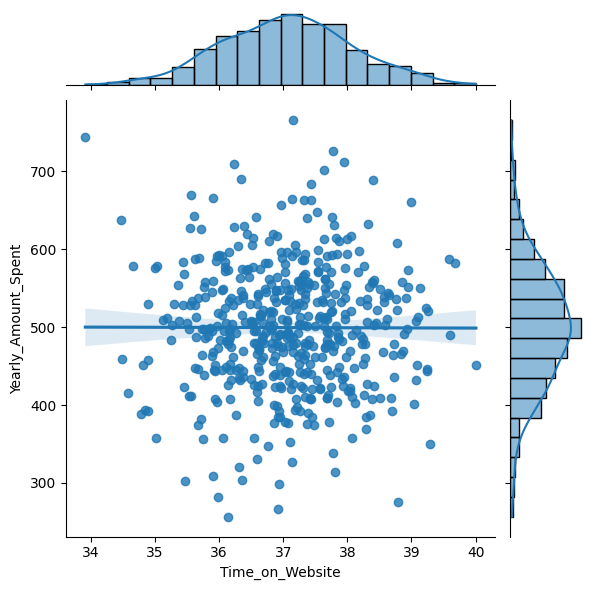

No direct correlation since the slope is flat


In [14]:
#1 Compute --Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.
# Is there a correlation?

sns.jointplot(data=df, x='Time_on_Website', y='Yearly_Amount_Spent', kind='reg')
plt.show()

print('No direct correlation since the slope is flat')
# However we can infer that the users who spent 37hrs on webbsite spent the most


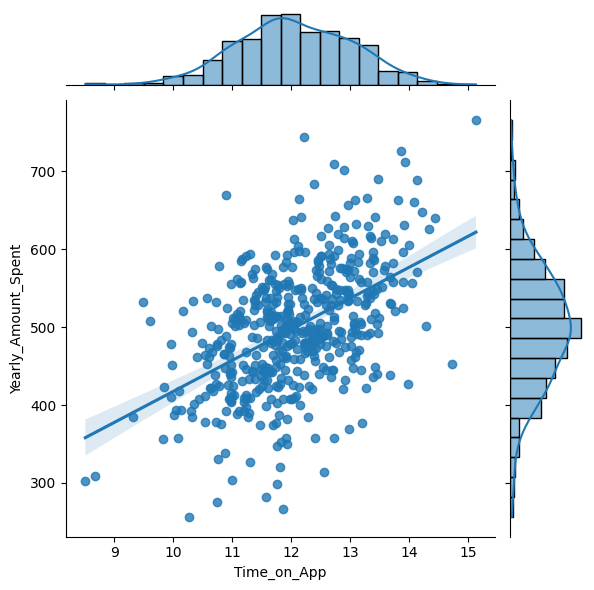

Positive slope indicates that time spent on app has a greater correlation to yearly amount spent when compared to time spent on website


In [16]:
#2 Compute –Do the same as above but now with Time on App and Yearly Amount Spent.
# Is this correlation stronger than 1st One?

sns.jointplot(data=df, x='Time_on_App', y='Yearly_Amount_Spent', kind='reg')
plt.show()

print('Positive slope indicates that time spent on app has a greater correlation to yearly amount spent when compared to time spent on website')


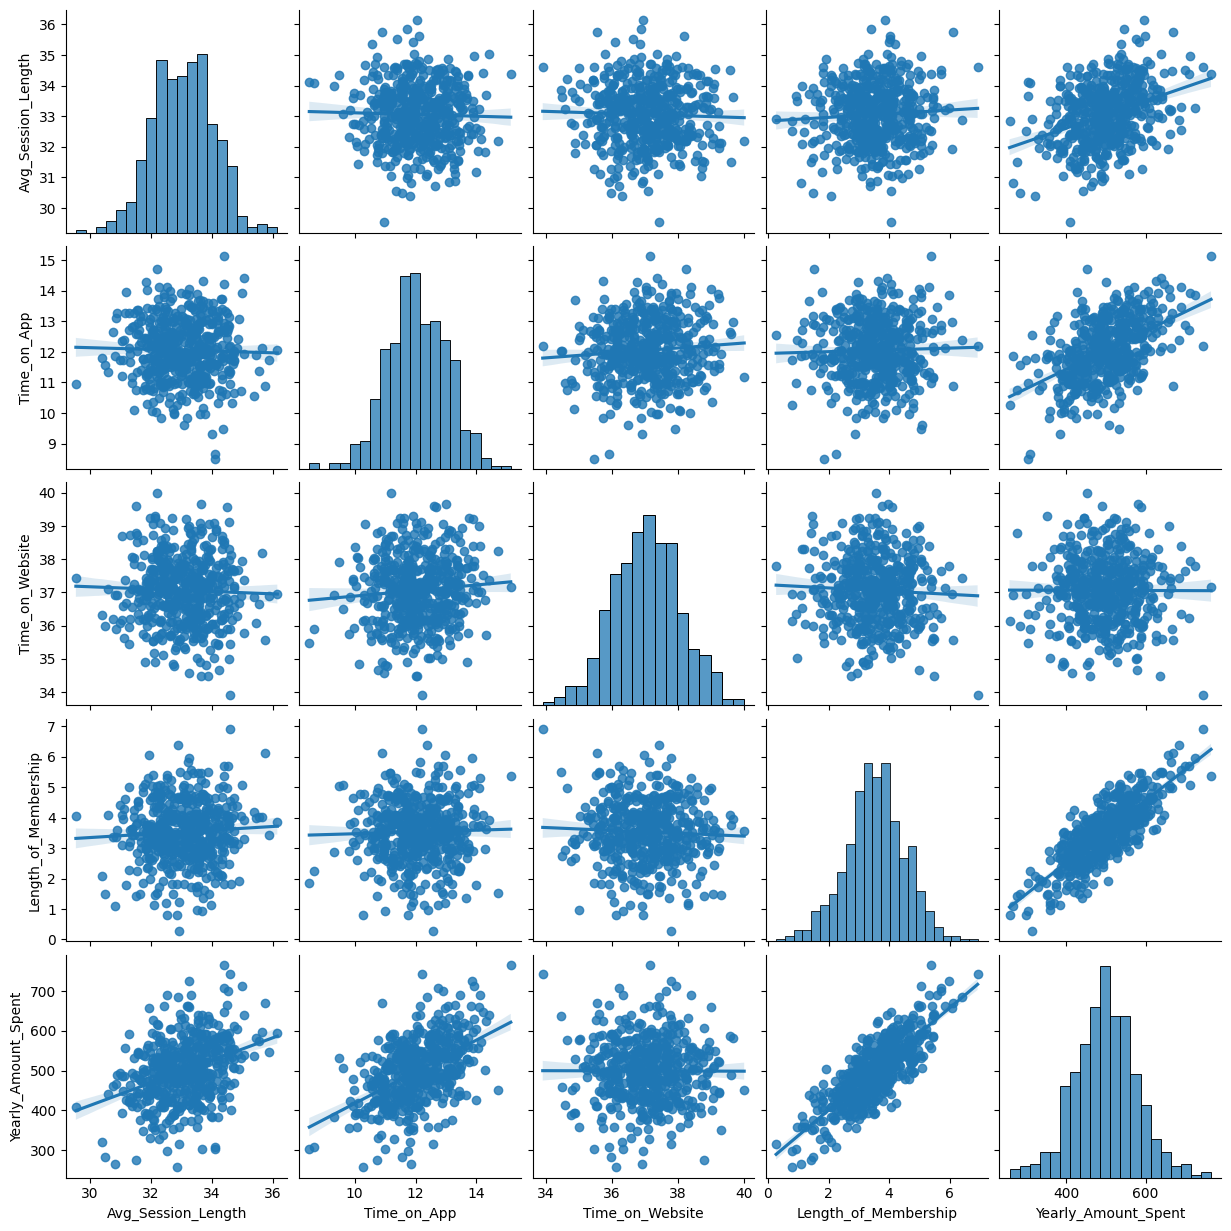

The most correlated feature with the Yearly Amount Spent is Length of membership


In [26]:
#3 Compute --Explore types of relationships across the entire data set using pairplot.
# Based on this plot what looks to be the most correlated feature with the Yearly Amount Spent? 

sns.pairplot(df,vars=['Avg_Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent'], kind='reg')
plt.show()

print('The most correlated feature with the Yearly Amount Spent is Length of membership')
# Followed by Time on App and Lastly Average session length in that order

# alternate way
# map_offdiag(sns.regplot)

In [17]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg_Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

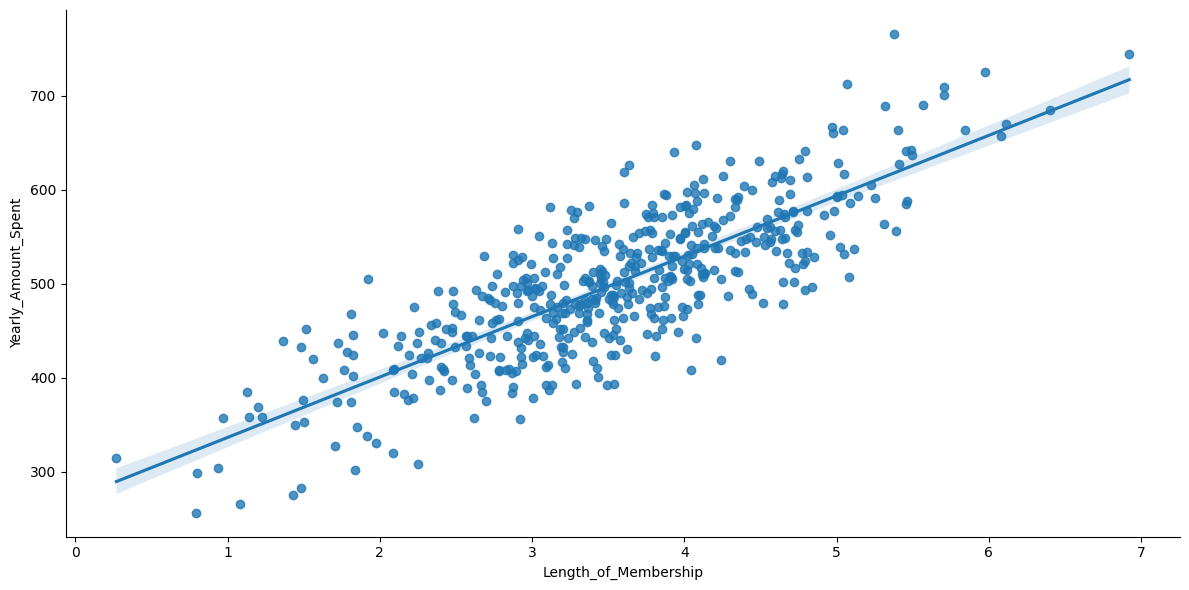

The positive slope and the cluster of the scatter points suggests that the data fits well in a linear plot


In [44]:
#4 Compute –Create a linear model plot of the Length of Membership and Yearly Amount Spent.
# Does the data fit well in a linear plot?

sns.lmplot(data=df, x='Length_of_Membership', y='Yearly_Amount_Spent', height=6, aspect=2)
plt.show()

print('The positive slope and the cluster of the scatter points suggests that the data fits well in a linear plot')

# alternate
# sns.regplot(x=df['Length_of_Membership'], y=df['Yearly_Amount_Spent'])

In [56]:
#5 Compute –Train and Test the data and answer multiple questions --What is the use of random_state=85?

X, y = df['Length_of_Membership'].values.reshape(-1,1), df['Yearly_Amount_Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=85)

print("Random state ensures that the same kind of split is performed each time on the data")

Random state ensures that the same kind of split is performed each time on the data


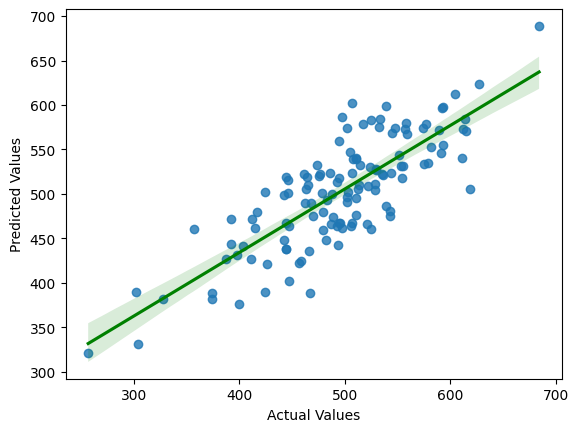

0.6385122637037488
Actual and predicted data


In [ ]:
#6 Compute –Predict the data and do a scatter plot. Check if actual and predicted data match.

model = LinearRegression()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

sns.regplot(x=y_test,y=ypred, line_kws={'color' :'green'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

print(model.score(X_test,y_test))
print('''From the scatter plot we see that the scatter points are clustered pretty close to the reg line suggesting that
      the Actual and predicted data matches''')

# to add line to a scatter plot
# plt.scatter(x=y_test,y=ypred)  #plotted reg line might not be accurate compared to regplot
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)

In [86]:
#7 What is the value of Root Mean Squared Error?

mse = mean_squared_error(y_test, ypred)   #squared parameter = False takes the square root
print('The root mean square is', np.sqrt(mse))
#print(mse)

The root mean square is 42.43453879872978


In [77]:
print(sklearn.__version__)

1.6.1
